In [1]:
import warnings
warnings.filterwarnings("ignore")

import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rc('pdf', fonttype=42) # Avoid type 3 fonts

sns.set_theme(style="white")
sns.set_palette(sns.color_palette("tab10"))

In [2]:
BASE_DIR = '../ios'
DATA_DIR = os.path.join(BASE_DIR, '../results/ios-2023-03-18')

FILES = [
    '2023-03-18-180340_seop_iPhone11-8_14-0.json',
    '2023-03-18-180358_seop_iPhone12-1_16-3.json',
    '2023-03-18-181553_seop_iPhone13-2_15-6-1.json',
    '2023-03-18-182833_seop_iPhone14-5_16-0-2.json',
    '2023-03-18-184306_seop_iPhone14-7_16-1.json',
]


def get_device_info(device_name):
    with open(os.path.join(BASE_DIR, 'models.json')) as f:
        return json.load(f)[device_name]


def read_data(path):
    with open(path) as f:
        d = json.load(f)
        
    info = get_device_info(d['device'])
    
    return pd.DataFrame(data={
        'Device': info['name'],
        'OS Version': d['version'],
        'Chip': info['chip'],
        'Configuration': f"{info['name']} ({d['version']})",
        'Measurement': [float(x) * 1000 for x in d['executionTimeSeconds']],
    })


def read_all_data():
    for f in FILES:
        path = os.path.join(DATA_DIR, f)
        x = read_data(path)
        yield x
        
df = pd.concat(read_all_data())
df.sample(10)

,Device,OS Version,Chip,Configuration,Measurement
474,iPhone 14,16.1,A15,iPhone 14 (16.1),6.437063
817,iPhone 12,15.6.1,A14,iPhone 12 (15.6.1),8.682966
223,iPhone XR,14.0,A12,iPhone XR (14.0),7.587910
606,iPhone 11,16.3,A13,iPhone 11 (16.3),14.832973
820,iPhone XR,14.0,A12,iPhone XR (14.0),9.157062
336,iPhone 13,16.0.2,A15,iPhone 13 (16.0.2),6.582022
939,iPhone 12,15.6.1,A14,iPhone 12 (15.6.1),8.705020
915,iPhone XR,14.0,A12,iPhone XR (14.0),8.919001
377,iPhone 13,16.0.2,A15,iPhone 13 (16.0.2),6.546021
685,iPhone 14,16.1,A15,iPhone 14 (16.1),6.328106


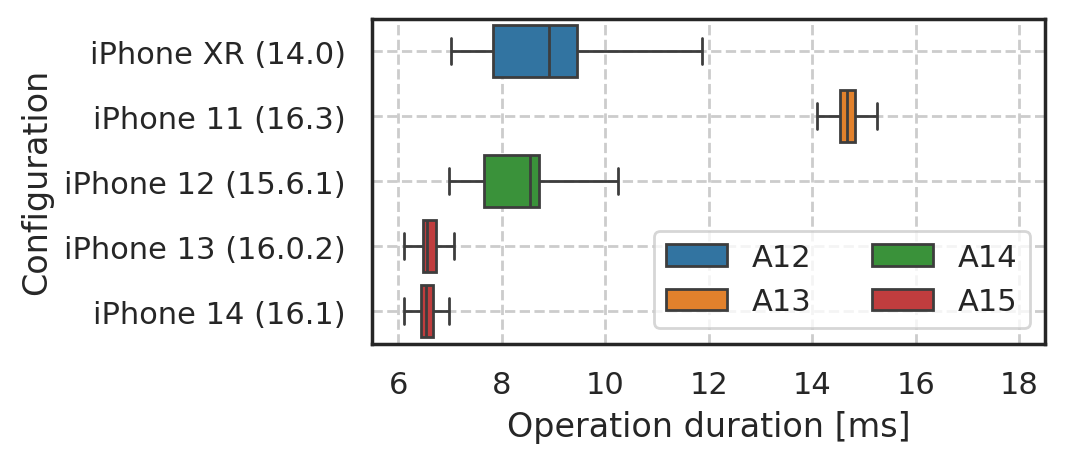

In [3]:
#
# Box plot with the iOS ECDH execution times
#

fig, ax = plt.subplots()
fig.set_size_inches((5.5, 2.5))

sns.boxplot(
    data=df,
    y='Configuration',
    x='Measurement',
    hue='Chip',
    ax=ax,
    showfliers = False,
    dodge = False,
    
)

ax.set_xlabel("Operation duration [ms]")
ax.set_xlim((5.5, 18.5))

ax.set_ylabel("Configuration")

ax.grid(ls='--')

ax.legend(loc='lower right',ncol=2)

fig.tight_layout()
fig.savefig("output/ios-operation-box-plot.pdf", dpi=300, bbox_inches='tight')

In [4]:
#
# Intermediate dataset with the p10 execution times
#

measured = df.groupby('Device')[['Measurement']].quantile(0.1)
measured.to_csv('output/ios-p10-times.csv')
measured

,Measurement
Device,
iPhone 11,13.132536
iPhone 12,7.322431
iPhone 13,5.868971
iPhone 14,5.678403
iPhone XR,7.402503
